<a href="https://colab.research.google.com/github/leethanhvaan20302/A.I.-Artificial-Intelligence/blob/main/BT1__Face_Shape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import các thư viện cần thiết, bao gồm: Keras, numpy, matplotlib, và os.
from keras.models import Sequential, Model 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from numpy import asarray
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Di chuyển tới thư mục
%cd /content/drive/MyDrive/Fl Colab/Face Shape

/content/drive/.shortcut-targets-by-id/1AU6LdRPpq4_uCs93F3Ehgqnn9sWZUuCH/Face Shape


In [ ]:
# Khởi tạo dữ liệu cho quá trình training và validation bằng cách sử dụng
"""Sử dụng lớp ImageDataGenerator để tiền xử lý dữ liệu ảnh. 
Hàm rescale=1./255 giúp chia giá trị của các pixel trong ảnh cho 255 để đưa giá trị về khoảng [0,1]. shear_range, zoom_range 
và horizontal_flip là các thuộc tính khác của lớp ImageDataGenerator giúp tăng tính đa dạng của dữ liệu.

Khởi tạo training data và validation data bằng phương thức flow_from_directory của lớp ImageDataGenerator. 
Tham số target_size là kích thước của ảnh sau khi được resize về cùng kích thước, 
batch_size là số lượng ảnh được truyền vào mô hình mỗi lần tính toán,
và class_mode='categorical' là chế độ phân loại đa lớp cho mô hình."""
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training = train_datagen.flow_from_directory('/content/drive/MyDrive/Fl Colab/Face Shape/train',target_size = (150,150), batch_size = 32,class_mode='categorical')
validation=train_data.flow_from_directory('/content/drive/MyDrive/Fl Colab/Face Shape/valid',target_size=(150,150), batch_size=32, class_mode='categorical')
    

Found 348 images belonging to 5 classes.
Found 152 images belonging to 5 classes.


In [ ]:

# Kiểm tra các thuộc tính của tập dữ liệu training
training.class_indices

{'heart': 0, 'oblong': 1, 'oval': 2, 'round': 3, 'square': 4}

In [ ]:
# Kiểm tra các thuộc tính của tập dữ liệu validation
validation.class_indices

{'heart': 0, 'oblong': 1, 'oval': 2, 'round': 3, 'square': 4}

In [ ]:
# Tạo ra mạng CNN để train mô hình
"""Tạo model CNN bằng cách sử dụng lớp Conv2D để thêm các layer convolution, lớp MaxPooling2D để giảm chiều của ảnh,
 lớp Flatten để chuyển đổi dữ liệu ảnh thành một vector 1D, lớp Dense để thêm các layer fully connected, và lớp Dropout để tránh overfitting."""
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:

# Biên dịch model bằng cách sử dụng hàm compile, với các tham số như: optimizer, loss, và metrics.

model.compile(
    optimizer = 'Adam',
    loss='categorical_crossentropy',
    metrics = 'accuracy'
)
# Tiến hành quá trình training model bằng cách sử dụng hàm fit.
train = model.fit(training,epochs = 30,validation_data=validation,verbose = 1)

Epoch 1/30
11/11 [==============================] - 7s 433ms/step - loss: 0.9996 - accuracy: 0.6092 - val_loss: 2.0409 - val_accuracy: 0.2368
Epoch 2/30
11/11 [==============================] - 6s 521ms/step - loss: 0.9968 - accuracy: 0.5920 - val_loss: 2.1881 - val_accuracy: 0.2500
Epoch 3/30
11/11 [==============================] - 4s 402ms/step - loss: 0.9318 - accuracy: 0.6408 - val_loss: 2.2712 - val_accuracy: 0.2697
Epoch 4/30
11/11 [==============================] - 4s 412ms/step - loss: 0.9485 - accuracy: 0.5977 - val_loss: 2.6361 - val_accuracy: 0.2171
Epoch 5/30
11/11 [==============================] - 6s 523ms/step - loss: 0.8941 - accuracy: 0.6494 - val_loss: 2.4923 - val_accuracy: 0.2368
Epoch 6/30
11/11 [==============================] - 4s 410ms/step - loss: 0.8418 - accuracy: 0.6695 - val_loss: 2.5151 - val_accuracy: 0.2368
Epoch 7/30
11/11 [==============================] - 5s 416ms/step - loss: 0.8205 - accuracy: 0.6552 - val_loss: 2.5398 - val_accuracy: 0.2171
Epoch 

In [ ]:

# Đánh giá độ chính xác của mô hình bằng cách sử dụng hàm evaluate.
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.39437928795814514
Train Accuracy 0.8505747318267822


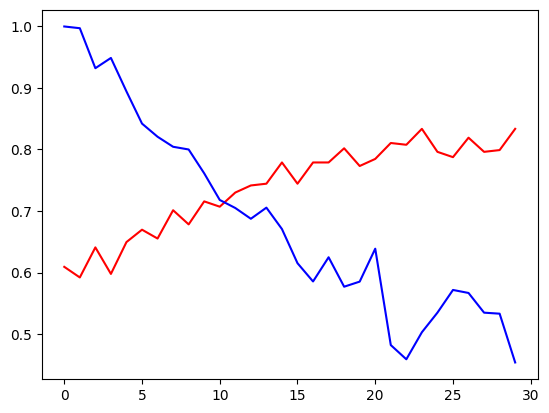

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot( epochs, accuracy, 'r', label = 'Training accuracy')
plt.plot( epochs, loss, 'b', label = 'Training loss')
plt.show()

In [ ]:

# Lưu mô hình bằng hàm save. 
from google.colab import drive
model.save('/content/drive/MyDrive/Save ModelS/FaceDefine.h5')

In [ ]:

# Load model đã lưu bằng hàm load_model.
from tensorflow.keras.models import load_model
model_1=load_model('/content/drive/MyDrive/Save ModelS/FaceDefine.h5')

1/1 [==============================] - 8s 8s/step
Đây là khuôn mặt có độ dài lớn nhất, chiều rộng của trán, xương gò má và hai bên hàm dưới tương đối bằng nhau. Nếu khuôn mặt hình chữ nhật kết hợp với ngũ quan tốt thì là tướng đại phú đại quý. Nếu kết hợp với nét tướng tai dày, miệng rộng, cằm lồi và hướng lên trên thì cả đời phú quý. Khuôn mặt chữ nhật mà lông mày thưa thì sẽ phá tướng, gây cản trở sự nghiệp. Nếu cằm ngắn thì dương thọ ngắn. Mặt to mũi nhỏ thì vận số xấu, cuộc đời vất vả, tình duyên lận đận. Nhìn chung, nam giới có khuôn mặt hình chữ nhật sẽ có cuộc sống hạnh phúc, liên tục gặp vận tốt về tiền bạc và gia đình. Còn nữ giới thì suốt đời được hưởng hạnh phúc.


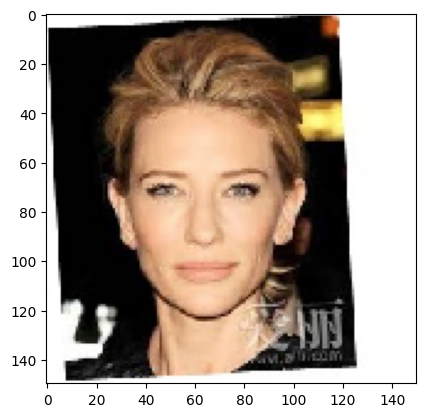

In [ ]:

# Chạy thử kết quả
"""Sử dụng model để dự đoán trên ảnh mới bằng cách sử dụng hàm predict và xác định class của ảnh bằng cách sử dụng hàm argmax."""

test="/content/drive/MyDrive/Face Shape/test"

for i in listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())

  class_name=[
  'Người có hình dạng mặt trái tim được cho là những người trong sáng, hiền lành và có trái tim nhân hậu. Họ sống tích cực, lạc quan và đơn giản. Đặc biệt, nữ giới sở hữu mặt trái tim luôn hết mình giúp đỡ người khác mà không cần phải báo đáp. Nam giới, nữ giới mang tướng mặt này đều có khả năng tư duy logic, thông minh và đầu óc nghệ thuật tương đối cao. Ở họ có sự sáng tạo, trực giác tốt, có tấm lòng yêu thương người khác.',
  'Đây là khuôn mặt có độ dài lớn nhất, chiều rộng của trán, xương gò má và hai bên hàm dưới tương đối bằng nhau. Nếu khuôn mặt hình chữ nhật kết hợp với ngũ quan tốt thì là tướng đại phú đại quý. Nếu kết hợp với nét tướng tai dày, miệng rộng, cằm lồi và hướng lên trên thì cả đời phú quý. Khuôn mặt chữ nhật mà lông mày thưa thì sẽ phá tướng, gây cản trở sự nghiệp. Nếu cằm ngắn thì dương thọ ngắn. Mặt to mũi nhỏ thì vận số xấu, cuộc đời vất vả, tình duyên lận đận. Nhìn chung, nam giới có khuôn mặt hình chữ nhật sẽ có cuộc sống hạnh phúc, liên tục gặp vận tốt về tiền bạc và gia đình. Còn nữ giới thì suốt đời được hưởng hạnh phúc.',
  'Đây là khuôn mặt có xương hàm thon gọn, cằm không quá dài, xương hàm và cằm tạo nên hình dáng tương tự như hình elip. Đây là gương mặt đẹp nhất trong các gương mặt. Người sở hữu tướng mặt này thường có hậu vận tốt, đường công danh xán lạn, gặp may mắn và thuận lợi trong cuộc sống. Bên cạnh đó, họ cũng dễ gây được thiện cảm với người đối diện dù gặp lần đầu. Vì có đường công danh rộng mở nên cơ hội thăng tiến cao. Họ thích hợp với vị trí lãnh đạo, cấp trên.',
  'Người có khuôn mặt tròn có đặc điểm chiều cao và chiều rộng của khuôn mặt gần bằng nhau. Xương gò má không nhìn thấy rõ và gò má không góc cạnh. Khuôn mặt của họ khá tròn trịa, có phần trẻ con.Tuy vậy, tính cách của họ lại vô cùng người lớn. Họ sống giàu tình thương, nhạy cảm nên dễ bị mê hoặc bởi người khác phái. Đôi lúc họ cũng hơi bốc đồng và bất nhất giữa lời nói và hành động. Những người này có số giàu sang phú quý nhưng hay phải đi xa lập nghiệp. Nếu không giữ được lập trường thì dễ sa vào con đường xấu, ảnh hưởng đến tương lai',
  'Người có tướng mặt hình vuông thường quyết đoán, làm chủ vận thế.Nếu là đàn ông thì có số quý tướng, thường làm quan và có sự nghiệp rộng mở. Ở họ toát lên vẻ mạnh mẽ, khí chất, là chỗ dựa vững chắc cho gia đình.'
]
  print(class_name[result])
  
plt.show()
